# Deep Convloutional GAN (DCGAN)

- Referecnce : https://github.com/eriklindernoren/PyTorch-GAN

In [5]:
import argparse
import os
import numpy as np
import math
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Use MNIST Dataset & DataLoader

In [7]:
bs =128

dataset = datasets.MNIST("./mnist", train=True, download=True, 
                         transform=transforms.Compose([transforms.Resize(32), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=True, drop_last=True)

torch.Size([128, 1, 32, 32]) tensor([2, 6, 0, 8, 0, 6, 2, 5, 9, 8, 6, 4, 4, 0, 9, 9, 1, 1, 7, 7, 4, 9, 6, 2,
        4, 4, 2, 0, 4, 6, 2, 6, 5, 4, 8, 1, 2, 7, 2, 1, 0, 7, 4, 0, 5, 6, 6, 4,
        4, 0, 7, 0, 4, 1, 1, 3, 6, 4, 1, 7, 5, 5, 6, 3, 0, 4, 2, 8, 0, 0, 0, 2,
        9, 2, 8, 7, 6, 5, 2, 7, 0, 9, 8, 6, 5, 5, 8, 6, 0, 1, 4, 8, 4, 8, 8, 4,
        1, 4, 8, 1, 7, 4, 3, 0, 8, 1, 5, 1, 7, 4, 9, 4, 7, 3, 0, 0, 5, 8, 9, 3,
        7, 1, 7, 0, 3, 0, 2, 4])


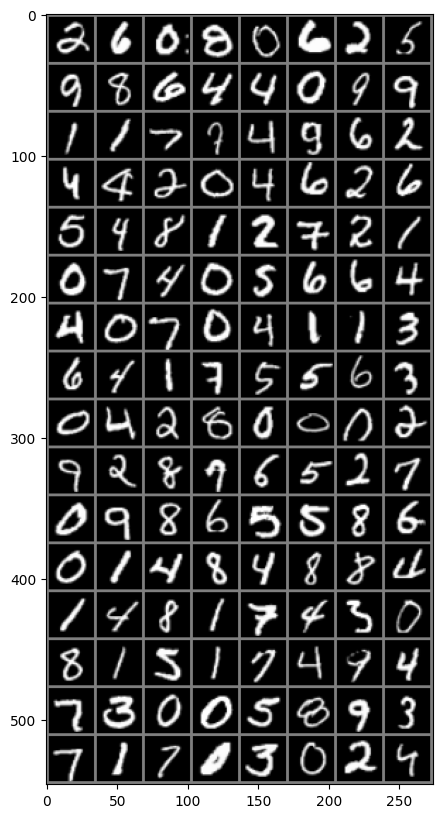

In [9]:
batch = next(iter(dataloader))
len(batch)
print(batch[0].shape, batch[1])

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(20,10))
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
imshow(torchvision.utils.make_grid(batch[0]))

## Define Generator & Discriminator
### Generator architecture
input random vector: 100 dim
* Linear: out_features 128 * 8 * 8
* BatchNorm2d
* Upsample: scale_factor 2
* Conv2d: out_channel: 128, kernel size 3, stride 1, padding 1
* BatchNorm2d
* LeakyReLU: 0.2
* Upsample: scale_factor 2
* Conv2d: out_channel: 64, kernel size 3, stride 1, padding 1
* BatchNorm
* LeakyReLU: 0.2
* Conv2d: out_channel: 1, kernel size 3, stride 1, padding 1
* Tanh

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        #### Implement Here ####
        # self.fc1 = 
        # self.bn1 = 
        # self.us = 
        # self.conv1 = 
        # self.bn2 = 
        # self.act = 
        # self.conv2 = 
        # self.bn3 = 
        # self.conv3 = 
        # self.last_act =


    def forward(self, z):
        #### Implement Here ####
        #### Hint : z should be reshaped into 2d before going into bn layer
        z = self.fc1(z)
        img = z.view(-1, 128, 8, 8)
        img = self.conv1(self.us(self.bn1(img)))
        img = self.conv2(self.us(self.act(self.bn2(img))))
        img = self.conv3(self.act(self.bn3(img)))
        img = self.last_act(img)

        return img

### Discriminator architecture
input: [1 , 32 , 32] image 
* Conv2d: out_channel: 16, kernel size 3, stride 2, padding 1
* LeakyReLU: 0.2
* Dropout: 0.25
* Conv2d: out_channel: 32, kernel size 3, stride 2, padding 1
* LeakyReLU: 0.2
* Dropout: 0.25
* BatchNorm2d
* Conv2d: out_channel: 64, kernel size 3, stride 2, padding 1
* LeakyReLU: 0.2
* Dropout: 0.25
* BatchNorm2d
* Conv2d: out_channel: 128, kernel size 3, stride 2, padding 1
* LeakyReLU: 0.2
* Dropout: 0.25
* BatchNorm2d
* Linear: out_features 1
* Sigmoid

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        #### Implement Here ####






        
    def make_block(self, in_channel, out_channel, bn= True):
        #### Implement Here ####
        layers = [
            # nn.Conv2d(in_channel, out_channel, ?, ?, ?),
            # nn.LeakyReLU(?),
            # nn.Dropout(?),
        ]
        if bn:
            # layers.append(?)
        
        return nn.Sequential(*layers) 
        
        
    def forward(self, img):# [1, 32, 32]
        #### Implement Here ####
        img = self.block1(img)
        img = self.block2(img)
        img = self.block3(img)
        img = self.block4(img)
        x = img.view(-1,128*2*2)
        x = self.last_act(self.fc(x))

        return x


In [ ]:
# Initialize generator and discriminator
G = Generator()
D = Discriminator()

In [ ]:
from torchsummary import summary
summary(G, device = 'cpu', batch_size = -1, input_size = (100,))
summary(D, device = 'cpu', batch_size = -1, input_size = (1, 32, 32))

## Weight Initialization

In [ ]:
def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1: # Conv2d layer weights init
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1: # BatchNorm2d layer weights init
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)


# weight initialize
G.apply(weights_init_normal)
D.apply(weights_init_normal)

## Define loss & Optimizer & model

* loss : BCELoss
* optimizer (for both G, D) : Adam with {lr=0.0002, betas=(0.5, 0.9999)} 

In [ ]:
#### Implement Here ####
# Loss function




# Optimizer


## Start Training

In [ ]:
G, D = G.to(device), D.to(device)
os.makedirs("./dcgan_images", exist_ok=True)
epochs = 20

In [ ]:
for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(dataloader):

        real_imgs = real_imgs.to(device)

        # Sample noise as generator input
        z = torch.Tensor(np.random.normal(0, 1, (real_imgs.shape[0], 100))).to(device)

        # -----------------
        #  Train Generator
        # -----------------
        #### Implement Here ####







        
        # ---------------------
        #  Train Discriminator
        # ---------------------
        #### Implement Here ####
        






        # ---------------------
        
        
        
        batches_done = epoch * len(dataloader) + i

        if batches_done % 100 == 0:
            print(
                "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
                % (epoch, epochs, i, len(dataloader), d_loss.item(), g_loss.item())
            )

        if batches_done % 2000 == 0:
            save_image(gen_imgs.data, "dcgan_images/%06d.png" % batches_done, nrow=8, normalize=True)
            imshow(torchvision.utils.make_grid(gen_imgs.cpu()))

## Inference
- Check noise space

In [ ]:
G.eval()
D.eval()

# 랜덤 노이즈(noise) 샘플링
z = torch.normal(mean=0, std=1, size=(100, 100)).to(device)

# 이미지 생성
gen_img = G(z)

imshow(torchvision.utils.make_grid(gen_img.detach().cpu(), nrow=10))

### Vector arithmetic 
- Pick three samples of cluster and take mean

In [ ]:
ones = (z[17].unsqueeze(0) + z[20].unsqueeze(0) + z[81].unsqueeze(0)) / 3
sevens = (z[0].unsqueeze(0) + z[10].unsqueeze(0) + z[12].unsqueeze(0)) / 3
nines = (z[22].unsqueeze(0) + z[20].unsqueeze(0) + z[97].unsqueeze(0)) / 3

In [ ]:
# ones
gen_img = G(ones).detach().cpu()
plt.imshow(gen_img.squeeze(0).permute(1, 2, 0).squeeze(2), cmap='gray')
plt.show()

In [ ]:
# sevens
gen_img = G(sevens).detach().cpu()
plt.imshow(gen_img.squeeze(0).permute(1, 2, 0).squeeze(2), cmap='gray')
plt.show()

In [ ]:
# twos
gen_img = G(nines).detach().cpu()
plt.imshow(gen_img.squeeze(0).permute(1, 2, 0).squeeze(2), cmap='gray')
plt.show()

In [ ]:
# vector_arithmetic
gen_vec = - ones + nines
gen_img = G(gen_vec).detach().cpu()
plt.imshow(gen_img.squeeze(0).permute(1, 2, 0).squeeze(2), cmap='gray')
plt.show()

### Noise Interpolation Visualize
- interpolate noise vector and visualize

In [ ]:
num_inter = 10
current = torch.Tensor(size=(num_inter, 100)).to(device)
for i in range(num_inter):
    current[i] = (sevens.squeeze(0) * (i / (num_inter-1)) + nines.squeeze(0) * (((num_inter-1) - i) / (num_inter-1)))

gen_img = G(current).detach().cpu()
print(gen_img.shape)
imshow(torchvision.utils.make_grid(gen_img, nrow=num_inter))